In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae

%matplotlib inline

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/airmiles.csv')

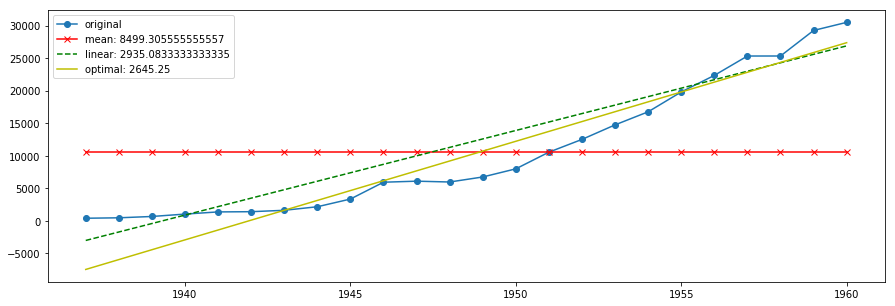

In [124]:
def linear_func(airmiles, alfa = None, beta = 0.0):
    if alfa is None:
        mean_value = np.mean(airmiles)
        return [mean_value] * len(airmiles)
    
    return [alfa*idx + beta for idx, _ in enumerate(airmiles)]

plt.figure (figsize=(15,5))
plt.plot( df.time, df.airmiles, 'o-', label = 'original');
plt.plot( df.time, linear_func(df.airmiles), 'x-' , c='r', label=f'mean: {mae(df.airmiles, linear_func(df.airmiles))}');
plt.plot( df.time, linear_func(df.airmiles, 1300, -3000), '--' , c='g', label=f'linear: {mae(df.airmiles, linear_func(df.airmiles, 1300, -3000))}');
plt.plot( df.time, linear_func(df.airmiles, 1515, -7456), '-' , c='y', label=f'optimal: {mae(df.airmiles, linear_func(df.airmiles, 1515, -7456))}');

plt.legend();

In [83]:
def search_opt_linear(alfa_range, beta_range):
    
    opt_min = 2645.75
    alfa = 1280.0
    beta = -4990.0

    for beta_opt in beta_range:
        for alfa_opt in alfa_range:
    
            new_min = mae(df.airmiles, linear_func(df.airmiles, alfa_opt, beta_opt))
    
            if new_min < opt_min:
                opt_min = new_min
                alfa = alfa_opt
                beta = beta_opt
                        
    return opt_min, alfa, beta    

search_opt_linear(range(1410,1520,1),range(-7600, -7300, 1))

(2645.25, 1515, -7456)

In [117]:
print(mae(df.airmiles, linear_func(df.airmiles, 1515, -7456)))
mae(df.airmiles, linear_func(df.airmiles, 1515, -7455))

2645.25


2645.25